### Planning

### Introduction: Bussiness problem and who'd be interested

### If a neighborhood or region has lots of comercial stablishments, turistic places or crowded places, it is likely that hotels in the area will profit more. But if the area has lots of this features it is likely that there are already lots of hotels. And hotel profits likely rise in the absence of other hotels around. So the question is, how do we determine whats the best place for a new hotel given this two features for each region.

try to optimize for region. But keep the neighborhood radial areas in mind.

Classification of beachs/neighborhoods in Rio de Janeiro city:
A Turism related company might be interested in expanding its bussiness activities in the city of Rio de Janeiro. It might also be interested in retaining more clients. Hotel company managers for an example might want to invest in a new stablishment such as a new hotel inside the city or a beach resort, but how can they decide which neighborhood or region is the best to place their new facility, in terms of receiving and retaining more clients. But with so many options and variables at play how can they make the best decision?
1. 
    1. What attributes of each region have an impact. What is the magnitude of each impact and what fixed set of attributes or conditions of that region lead to the best results (in profit or nº of clients) ?
    2. For example, decrease in Nº of hotels per square foot in the region might increase profit less than increase in comercial activity might increase profit. So in this case a place with higher comercial activity and medium to high hotels/square-foot would be the go-to choice.
    
1. Beach Hotel managers, turism activities managers: beaches
2. Public resources manager: neighborhoods.


### Data: description of the data that will be used and source of the data.

#### Foursquare:

1. sample of venues around a given neighborhood or beach area, respective category types, rantings, address, ...
2. sample of hotels or competitors: quantity, types, rantings, adress... --> pousada, hotel, hostel, pensão, 
3. sample of comercial venues:  quantity, types, rantings, adress  --> padaria, restaurante, mercado, farmacia, bar, ponto de onibus, ponto de taxi, shopping, cinema, museu, teatro, praia, faculdade, universidade, escola, hospital, igreja, posto de saude, mercearia, hortifruti, parque, feira, .
4. sample of popular venues around: types, ratings, address
5. Residential:Z (see what's available) --> Residencia
6. Outsied data: rio.data: anything on the neighborhoods: Qualidade de vida e IDH por bairro
7. Escolas, hospitais


Idea: get data on the neighborhoods and cluster the neighborhoods. See for possible Classification or Regression.

step1: Explore venues around neighborhoods. Append each as a dataframe in a list
step2: Explore specifically for each venue for each neighborhood. Append each neighborhood as a dataframe in a list.
step3: Explore venues around beaches
step4: Same as step 2
step5: Search categories around each neighborhood. Append each search result as a dataframe in a cell of a two dimensional numpy array, where the indexes are the neighborhoods, columns the terms and cells a dataframe of venues as rows.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import urllib.request
import json
from pandas.io.json import json_normalize

from geopy.geocoders import Nominatim
import folium

In [3]:
nomi_obj = Nominatim(user_agent='IBM-coursera')

In [4]:
pd.set_option('display.max_rows', None)

# Defining Functions

### Coordinates: Receives a list of names and returns a dataframe containing names and its coordinates.

In [5]:
def frame_coords(lst, col_name='venue'):
    coords = []
    fail_list = []
    
    cnt = 0
    for item in lst:
        
        cnt2 = 0
        try:
            location = None
            while (location==None) and (cnt2<5):
                location = nomi_obj.geocode(item)
                cnt2+=1
                        
            if location!=None: coords.append((item, location[1][0], location[1][1]))
            else: 
                fail_list.append(item)
                print('Fail:', item)
                
            cnt = cnt+1
            if cnt in range(1, 500, 8): print('Appended:', len(coords), 'Attempts:', cnt)
        except: print(nomi_obj.geocode(item), location)
            
    print('Fail List: ', fail_list) 
    print('Completed')
    return pd.DataFrame(coords, columns=[col_name, 'lat', 'lng'])

In [6]:
frame_coords(['Rio de Janeiro, RJ'], 'rio')

Appended: 1 Attempts: 1
Fail List:  []
Completed


,rio,lat,lng
0,"Rio de Janeiro, RJ",-22.911014,-43.209373


### Mapping Functions

In [7]:
def plot_map(df, zoom=10):
    mapa = folium.Map(location = [-22.911014, -43.209373], zoom_start = zoom)


    for lat, lng, label in zip(df['lat'], df['lng'], df.iloc[:, 0]):
    
        label = folium.Popup(label, html_parser=True)
        folium.CircleMarker([lat, lng],
                            popup=label,
                            radius=3,
                            color='darkorange',
                            #fill=True,
                            #fill_color='blue',
                            #fill_oppacity=0.8
                           ).add_to(mapa)
    return mapa

In [8]:
def plot_map_lite(df, zoom=11):
    
    mapa = folium.Map(location = [-22.911014, -43.209373], zoom_start=zoom)

    for lat, lng, label in zip(df['lat'].values, df['lng'].values, df.iloc[:, 0].values):
    
        #label = folium.Popup(label, html_parser=True)
        folium.CircleMarker([lat, lng],
                            #popup=label,
                            radius=2,
                            color='darkred',
                            #fill=True,
                            #fill_color='blue',
                            #fill_oppacity=0.8
                           ).add_to(mapa)
    return mapa

In [9]:
def plot_search_map(df, zoom=11):
    
     
    mapa = folium.Map(location = [-22.911014, -43.209373], zoom_start=zoom)

    for lat, lng, label, radius in zip(df['lat'].values, df['lng'].values, df.iloc[:, 0].values, df['radius'].values):
    
        #label = folium.Popup(label, html_parser=True)
        folium.Circle([lat, lng],
                      #popup=label,
                      radius=radius,
                      color='darkred',
                      #fill=True,
                      #fill_color='blue',
                      #fill_oppacity=0.8
                     ).add_to(mapa)
    return mapa
    

# Initial Data Collection: Spots

In [7]:
turisticos = '''Aeroporto Santos Dumont
Aquário do Rio de Janeiro - AquaRio
Arcos da Lapa
Cais do Valongo
Capela Mayrink
Cascatinha Taunay
Catedral São Sebastião
Cidade das Artes
Cidade do Samba
Cinelândia
Cristo Redentor
Estação das Barcas
Estádio Olímpico Nilton Santos - Engenhão
Fortaleza de São João
Forte de Copacabana
Hipódromo da Gávea - Jóquei Club
Igreja da Candelária
Igreja da Penha
Ilha de Paquetá
Ilha Fiscal
Jardim Botânico
Jardim de Alah
Jardim Zoológico
Lagoa Rodrigo de Freitas
Largo da Carioca
Maracanã
Marina da Glória
Monumento aos Pracinhas
Mosteiro de São Bento
Museu de Arte do Rio - MAR
Museu do Amanhã
Orla Conde
Outeiro da Glória
Pão de Açúcar
Parque das Ruínas
Parque Madureira
Passarela do Samba - Sambódromo
Pavilhão de São Cristóvão
Pedra da Gávea
Planetário da Gávea
Planetário de Santa Cruz
Ponta do Arpoador
Praça XV
Quinta da Boa Vista
Vista Chinesa'''

In [8]:
tur = turisticos.split('\n')

In [9]:
culturais = '''Aquário do Rio de Janeiro - AquaRio
Biblioteca Nacional
Cais do Valongo
Capela Mayrink
Casa França-Brasil
Centro Cultural Banco do Brasil
Cidade das Artes
Ecomuseu do Quarteirão Cultural do Matadouro de Santa Cruz
Forte de Copacabana
Hipódromo da Gávea - Jóquei Club
Igreja da Candelária
Igreja da Penha
Ilha Fiscal
Mosteiro de São Bento
Museu Aeroespacial
Museu Casa do Pontal
Museu Chácara do Céu
Museu da República - Palácio do Catete
Museu de Arte do Rio - MAR
Museu de Arte Moderna
Museu do Amanhã
Museu Histórico Nacional
Outeiro da Glória
Parque das Ruínas
Planetário da Gávea
Planetário de Santa Cruz
Ponte dos Jesuítas
Praça XV
Teatro Municipal'''

In [10]:
cult = culturais.split('\n')

In [11]:
esportivos = '''Cidade das Crianças
Estádio Olímpico Nilton Santos - Engenhão
Maracanã
Parque Aquático Maria Lenk
Parque do Flamengo
Parque Madureira
Parque Poeta Manuel Bandeira
Parque Radical'''

In [12]:
sport = esportivos.split('\n')

In [13]:
ecologicos = '''Aparu do Jequiá
Bosque da Barra da Tijuca
Bosque da Freguesia
Campo de Santana - Praça da República
Cascatinha Taunay
Ecomuseu do Quarteirão Cultural do Matadouro de Santa Cruz
Fortaleza de São João
Jardim Botânico
Jardim Zoológico
Lagoa da Tijuca
Lagoa de Jacarepaguá
Lagoa de Marapendi
Lagoa Rodrigo de Freitas
Maciço da Pedra Branca
Maciço da Tijuca
Maciço do Gericinó
Morro do Leme
Paineiras
Parque do Flamengo
Parque Eduardo Guinle
Parque Henrique Lage
Parque Nacional da Tijuca
Parque Natural Municipal da Cidade
Parque Natural Municipal de Marapendi
Parque Natural Municipal Dois Irmãos (Arquiteto Sérgio Bernardes)
Pedra Bonita
Pedra da Gávea
Sítio Roberto de Burle Marx'''

In [14]:
eco = ecologicos.split('\n')

# Initial Data Collection: Neighborhoods

In [15]:
a_g = '''Abolição
 Acari
 Água Santa
 Alto da Boa Vista
 Anchieta
 Andaraí
 Anil
 Bancários
 Bangu
 Barra da Tijuca
 Barra de Guaratiba
 Barros Filho
 Benfica
 Bento Ribeiro
 Bonsucesso
 Botafogo
 Brás de Pina
 Cachambi
 Cacuia
 Caju
 Camorim
 Campinho
 Campo dos Afonsos
 Campo Grande
 Cascadura
 Catete
 Catumbi
 Cavalcanti
 Centro
 Cidade de Deus
 Cidade Nova
 Cidade Universitária
 Cocotá
 Coelho Neto
 Colégio
 Complexo do Alemão
 Copacabana
 Cordovil
 Cosme Velho
 Cosmos
 Costa Barros
 Curicica
 Del Castilho
 Deodoro
 Encantado
 Engenheiro Leal
 Engenho da Rainha
 Engenho de Dentro
 Engenho Novo
 Estácio
 Flamengo
 Freguesia (Ilha do Governador)
 Freguesia (Jacarepaguá)
 Galeão
 Gamboa
 Gardênia Azul
 Gávea
 Gericinó
 Glória
 Grajaú
 Grumari
 Guadalupe
 Guaratiba'''

In [158]:
bairros1 = a_g.split('\n ')

In [159]:
h_p = ''' Higienópolis
 Honório Gurgel
 Humaitá
 Imperial de São Cristóvão
 Inhaúma
 Inhoaíba
 Ipanema
 Irajá
 Itanhangá
 Jabour
 Jacaré
 Jacarepaguá
 Jacarezinho
 Jardim América
 Jardim Botânico
 Jardim Carioca
 Jardim Guanabara
 Jardim Sulacap
 Joá
 Lagoa
 Lapa
 Laranjeiras
 Leblon
 Leme
 Lins de Vasconcelos
 Madureira
 Magalhães Bastos
 Mangueira
 Manguinhos
 Maracanã
 Maré
 Marechal Hermes
 Maria da Graça
 Méier
 Moneró
 Olaria
 Oswaldo Cruz
 Paciência
 Padre Miguel
 Paquetá
 Parada de Lucas
 Parque Anchieta
 Parque Columbia
 Pavuna
 Pechincha
 Pedra de Guaratiba
 Penha
 Penha Circular
 Piedade
 Pilares
 Pitangueiras
 Portuguesa
 Praça da Bandeira
 Praça Seca
 Praia da Bandeira'''

In [160]:
bairros2 = h_p.split('\n ')

In [161]:
q_z = '''Quintino Bocaiúva
 Ramos
 Realengo
 Recreio dos Bandeirantes
 Riachuelo
 Ribeira
 Ricardo de Albuquerque
 Rio Comprido
 Rocha
 Rocha Miranda
 Rocinha
 Sampaio
 Santa Cruz
 Santa Teresa
 Santíssimo
 Santo Cristo
 São Conrado
 São Francisco Xavier
 Saúde
 Senador Camará
 Senador Vasconcelos
 Sepetiba
 Tanque
 Taquara
 Tauá
 Tijuca
 Todos os Santos
 Tomás Coelho
 Turiaçu
 Urca
 Vargem Grande
 Vargem Pequena
 Vasco da Gama
 Vaz Lobo
 Vicente de Carvalho
 Vidigal
 Vigário Geral
 Vila Cosmos
 Vila da Penha
 Vila Isabel
 Vila Kennedy
 Vila Militar
 Vila Valqueire
 Vista Alegre
 Zumbi'''

In [162]:
bairros3 = q_z.split('\n ')

In [163]:
bairros = bairros1+bairros2+bairros3

In [164]:
raw_beaches = ''' \nRamos (1999 ):	
0,70
Km
 
Galeão (1999 ):	
1,00
Km
 
Bica (1999 ):	
3,00
Km
 
Guanabara (1999 ):	
1,60
Km
 
Bananal (1999 ):	
0,30
Km
 
Engenhoca (1999 ):	
0,40
Km
 
Gaegos (1999 ):	
1,30
Km
 
Pelônias (1999 ):	
0,70
Km
 
Bandeira (1999 ):	
0,90
Km
 
Dendê (1999 ):	
1,00
Km
 
Engenho Velho (1999 ):	
0,90
Km
 
Rosa (1999 ):	
1,40
Km
 
Tubiacanga (1999 ):	
3,90
Km
 
Cocotá (1999 ):	
0,50
Km
 
Alentejo (1999 ):	
0,60
Km
 
Brava (1999 ):	
0,50
Km
 
Amendoeira (1999 ):	
ND
Km
 
Itacolomi (1999 ):	
ND
Km
 
Golfinho (1999 ):	
0,90
Km
 
Jequiá (1999 ):	
0,50
Km
 
Intendente Bittencourt (1999 ):	
0,40
Km
 
Ribeira (1999 ):	
0,70
Km
 
Congonhas do Campo (1999 ):	
0,50
Km
 
Moça (1999 ):	
0,50
Km
 
Grande (1999 ):	
0,40
Km
 
Saco do Pinhão (1999 ):	
0,70
Km
 
São Bento (1999 ):	
1,00
Km
 
Olaria (1999 ):	
0,40
Km
 
Zumbi (1999 ):	
0,50
Km
 
Pitangueiras (1999 ):	
0,90
Km
 
Lameirão (1999 ):	
0,40
Km
 
Catimbau (1999 ):	
0,50
Km
 
Pintor Castanheto (1999 ):	
0,40
Km
 
São Roque (1999 ):	
0,30
Km
 
Moreninha (1999 ):	
0,30
Km
 
Dr. Aristão (1999 ):	
0,20
Km
 
José Bonifácio (1999 ):	
0,50
Km
 
Manoel Luiz (1999 ):	
0,30
Km
 
Imbuca (1999 ):	
0,30
Km
 
Gaivotas (1999 ):	
0,70
Km
 
Grossa (1999 ):	
0,30
Km
 
Tamoios (1999 ):	
0,90
Km
 
Buraco (1999 ):	
0,60
Km
 
Veloso (1999 ):	
0,30
Km
 
Flamengo (1999 ):	
1,70
Km
 
Botafogo (1999 ):	
0,70
Km
 
Fortaleza de São João (1999 ):	
0,30
Km
 
Urca (1999 ):	
0,20
Km
 
Vermelha (1999 ):	
0,20
Km
 

Cardo (1999 ):	
2,10
Km
 
Dona Luiza ou Recôncavo (1999 ):	
1,10
Km
 
Sepetiba (1999 ):	
2,60
Km
 
Aterro (1999 ):	
2,10
Km
 
Pedra de Guaratiba (1999 ):	
1,10
Km
 
Venda Grande (1999 ):	
0,40
Km
 
Capela (1999 ):	
0,30
Km
 

Barra de Guaratiba/Canto (1999 ):	
0,60
Km
 
Marambaia (1999 ):	
ND
Km
 
Canto (1999 ):	
ND
Km
 
Búzios (1999 ):	
ND
Km
 
Fora (1999 ):	
0,40
Km
 
Leme (1999 ):	
1,00
Km
 
Copacabana (1999 ):	
3,20
Km
 
Diabo (1999 ):	
0,50
Km
 
Arpoador (1999 ):	
0,80
Km
 
Ipanema (1999 ):	
2,00
Km
 
Leblon (1999 ):	
1,30
Km
 
Gávea ou Pepino (1999 ):	
2,90
Km
 
Vidigal (1999 ):	
0,50
Km
 
Amores (1999 ):	
0,40
Km
 
Grumari/Abricó (1999 ):	
2,80
Km
 
Pequena/Do Meio (1999 ):	
1,00
Km
 
Funda/Inferno (1999 ):	
1,10
Km
 
Pontal/Macumba (1999 ):	
2,60
Km
 
Bandeirantes/Barra da Tijuca (1999 ):	
12,10
Km
 
Joatinga (1999 ):	
0,50
Km
 
Prainha (1999 ):	
0,70
Km
 
Meio (1999 ):	
ND
Km
 
Perigoso (1999 ):	
ND
Km'''

# Initial Data Collection: Beaches

## Processing Text from "Armazeninho - Rio Prefeitura" to Get Beaches and Lengths

In [1179]:
import re

In [1180]:
praias = re.findall("(.+) \(\d\d\d\d\ " , raw_beaches)

In [1181]:
praias_ext = re.findall(':\t\n(.*)\nKm' , raw_beaches)
praias_ext = [float(i.replace(',','.')) if i!='ND' else np.nan for i in praias_ext]

In [1182]:
len(praias_ext), len(praias)

(79, 79)

In [1183]:
praias_df = pd.DataFrame({'beach':praias, 'length':praias_ext})

In [1195]:
#praias_df.to_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\\rio dataframes\\Initial Data\\praias_armazeninho_raw.csv')

## Scraping Table from Wikipedia Web Page for More Beaches and lenghts

In [1188]:
import urllib.request
from bs4 import BeautifulSoup as bs

In [1189]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_praias_da_cidade_do_Rio_de_Janeiro'
rqst_obj = urllib.request.urlopen(url)
soup_obj = bs(rqst_obj)

In [1190]:
soup_obj.text[1000:1200]

'1\n\n\nTamoios\n\n0,48\n\n\nVeloso\n\n0,15\n\nZona Norte[editar | editar código-fonte]\n\n\nBairro\n\nNome\n\nExtensão (km)\n\n\nBancários\n\nBancários\n\n0,18\n\n\nCongonhas do Campo / Barão\n\n0,29\n\n\nCacuia\n\nAlentejo\n\n0,40\n\n\nBrav'

In [1191]:
wiki = []
for i in range(4):
    
    for trs in soup_obj.find_all('table')[i].find_all('tr'):
        
        tds = trs.find_all('td')
               
        if tds!=[]:
            if len(tds)==3: 
                
                hood = tds[0].text.replace('\n', '')
                td1 = tds[1].text.replace('\n', '')
                td2=tds[2].text.replace('\n', '')                
                
                wiki.append([hood, td1, td2])
                
            else: 
                
                td0 = tds[0].text.replace('\n', '')
                td1=tds[1].text.replace('\n', '')  
                
                wiki.append([hood, td0, td1])
            

In [1192]:
wiki_beach = pd.DataFrame(wiki, columns=['neighborhood', 'beach', 'extension Km'])

In [1193]:
wiki_beach.head(3)

,neighborhood,beach,extension Km
0,Paquetá,Batata,"0,10"
1,Paquetá,Buraco,"0,06"
2,Paquetá,Catimbau,"0,31"


#### Saving wiki beach results

In [1194]:
#wiki_beach.to_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\\rio dataframes\\Initial Data\\praias_wikipedia_raw.csv')

## Evaluating Beaches Results: Armazeninho

In [606]:
len(error2)

11

In [ ]:
praias_coords = frame_coords(pd.Series(praias)+', RJ')

In [604]:
error2 = ['Gaegos, RJ', 'Pelônias, RJ', 'Intendente Bittencourt, RJ', 'Saco do Pinhão, RJ', 'Pintor Castanheto, RJ', 'Dona Luiza ou Recôncavo, RJ', 'Barra de Guaratiba/Canto, RJ', 'Gávea ou Pepino, RJ', 'Grumari/Abricó, RJ', 'Pequena/Do Meio, RJ', 'Funda/Inferno, RJ']

In [ ]:
plot_map(praias_coords.loc[:])

## Evaluating Beaches Result: Wikipedia

### First Try:

In [629]:
queries = wiki_beach['neighborhood']+', '+wiki_beach['beach']

In [ ]:
wiki_coords = frame_coords(queries, 'beach')

In [ ]:
plot_map(wiki_coords)

In [1200]:
len(wiki_coords)

65

#### Saving

In [1201]:
wiki_coords.to_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\\rio dataframes\\Initial Data\\praias\\wiki_coords_bairro+praia.csv')

### Second Try:

In [631]:
fail = ['Paquetá, Coqueiro', 'Paquetá, Coqueiros / Pintor Castagneto', 'Paquetá, Frades / Manoel Luiz', 'Paquetá, Gaivotas / Ribeira', 'Paquetá, Lameirão / Freire Júnior', 'Paquetá, Moreninha / Comprida / Dr. Aristão', 'Paquetá, Veloso', 'Bancários, Congonhas do Campo / Barão', 'Cacuia, Alentejo', 'Cacuia, Brava', 'Cacuia, Golfinho', 'Cidade Universitária, Amendoeira', 'Cidade Universitária, Duas Irmãs', 'Cidade Universitária, Polvo', 'Cidade Universitária, Varanda', 'Cidade Universitária, Velho Navio', 'Freguesia, Flamboyants', 'Freguesia, Guanabara / Freguesia', 'Freguesia, Pelônias', 'Freguesia, Saco do Pinhão', 'Galeão, Gaegos', 'Jardim Guanabara, Engenho Velho / Quebra-Coco', 'Ramos/Maré, Ramos', 'Barra da Tijuca, Barra da Tijuca', 'Barra de Guaratiba, Barra de Guaratiba', 'Barra de Guaratiba, Canto', 'Guaratiba, Brisa / Aterro', 'Grumari, Perigoso', 'Pedra de Guaratiba, Capela', 'Pedra de Guaratiba, Venda Grande', 'Sepetiba, Recôncavo / Dona Luiza', 'Copacabana, Prainha do Forte de Copacabana', 'Leme, Anel']

In [638]:
com_barra = [i for i in fail if '/' in i]
sem_barra = [i for i in fail if '/' not in i]

In [643]:
com_barra1 = frame_coords([i.split(' / ')[0] for i in com_barra])

Appended: 1 Attempts: 1
Fail: Bancários, Congonhas do Campo
Fail: Jardim Guanabara, Engenho Velho
Fail: Ramos/Maré, Ramos
Appended: 6 Attempts: 9
Fail List:  ['Bancários, Congonhas do Campo', 'Jardim Guanabara, Engenho Velho', 'Ramos/Maré, Ramos']
Completed


In [645]:
com_barra1.drop(5, axis=0)

,venue,lat,lng
0,"Paquetá, Coqueiros",-22.750639,-43.108726
1,"Paquetá, Frades",-22.768755,-43.111756
2,"Paquetá, Gaivotas",-22.766299,-43.104835
3,"Paquetá, Lameirão",-22.749521,-43.108329
4,"Paquetá, Moreninha",-22.754987,-43.111317
6,"Guaratiba, Brisa",-22.984877,-43.666022
7,"Sepetiba, Recôncavo",-22.986396,-43.692978


In [ ]:
plot_map()

## Evaluating Wiki Beach Results

In [1197]:
wiki_beach

,neighborhood,beach,extension Km
0,Paquetá,Batata,"0,10"
1,Paquetá,Buraco,"0,06"
2,Paquetá,Catimbau,"0,31"
3,Paquetá,Cidade,"0,09"
4,Paquetá,Coqueiro,"0,05"
...,...,...,...
93,Urca,Dentro,"0,12"
94,Urca,Fora,"0,43"
95,Urca,Vermelha,"0,25"
96,Urca,Urca,"0,11"


## Getting Beaches Using Foursquare API

### Preparing Coordinates for API Searches

In [707]:
lat1, lat2

(-22.9719642, -43.1843432)

In [1089]:
rows = []
for i in range(0, 7):
    rows.append(['center', lat1-0.077+0.01*i, lng1-0.4+0.06*i])
search_coords1 = pd.DataFrame(rows, columns=['venue', 'lat', 'lng'])

In [1070]:
rows = []
for i in range(0, 5):
    rows.append(['center', lat1+0.01+0.05*i, lng1+0.02-0.029*i])
search_coords2 = pd.DataFrame(rows, columns=['venue', 'lat', 'lng'])

In [1044]:
rows = []
for i in range(0, 2):
    rows.append(['center', lat1+0.175+0.04*i, lng1+0.01+0.07*i])
search_coords3 = pd.DataFrame(rows, columns=['venue', 'lat', 'lng'])

In [1045]:
rows = []
for i in range(0, 1):
    rows.append(['center', lat1+0.24+0.04*i, lng1-0.025+0.07*i])
search_coords4 = pd.DataFrame(rows, columns=['venue', 'lat', 'lng'])

In [1046]:
rows = []
for i in range(0, 4):
    rows.append(['center', lat1-0.04+0.033*i, lng1-0.44-0.06*i])
search_coords5 = pd.DataFrame(rows, columns=['venue', 'lat', 'lng'])

In [1090]:
search_coords_tst = pd.concat([search_coords1, search_coords2, search_coords3, search_coords4, search_coords5], axis=0)

In [1]:
plot_map(search_coords_tst)

NameError: name 'plot_map' is not defined

### Testing Coordinates for Search

In [1092]:
search_coords_plt = search_coords_tst.copy()

In [1100]:
search_coords_plt['radius'] = [4900. for i in range(len(search_coords_plt))]

In [ ]:
plot_search_map(search_coords_plt, zoom=10)

In [1102]:
search_coords = search_coords_tst

### Saving Artificial Coordinates

In [1103]:
#search_coords.to_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\\rio dataframes\\Initial Data\\litoral_coords.csv')

### Loading Artificial Coordinates

In [ ]:
search_coords = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\\rio dataframes\\Initial Data\\litoral_coords.csv').drop('Unnamed: 0', axis=1)

## Searching Beaches Using Foursquare API

In [1022]:
beach_id = '4bf58dd8d48988d1e2941735'

In [ ]:
rqst_txt = urllib.request.urlopen(foursquare_url(ctgr_search=True, ctgr_id=beach_id, radius=20000, lat=search_coords.lat[0], lng=search_coords.lng[0])).read().decode()[:]

In [655]:
rqst_df = json_normalize(json.loads(rqst_txt)['response']['venues'])

<ipython-input-655-ee959b5f77cc>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  rqst_df = json_normalize(json.loads(rqst_txt)['response']['venues'])


In [1112]:
fsqr_beach = get_venues(search_coords, radius=4900, ctgr_search=True, ctgr_id=beach_id)

<ipython-input-1108-5125f84a03d4>:46: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  else: rqst_df = json_normalize(json.loads(rqst_txt)['response']['venues'])


appended: 10 rqst_fail: 0 append_fail: 0
Searched: 19 Failed: 0
Fail list:  []
Completed


## Cleaning Search Result:

### Removing Duplicates

In [1115]:
len(fsqr_beach['name']), len(fsqr_beach['name'].unique())

(485, 293)

In [1142]:
fsqr_beach.drop_duplicates(subset=['name'], inplace=True)

### Formatting

In [1154]:
cols = fsqr_beach.columns.

['venue',
 'id',
 'name',
 'category_id',
 'category',
 'location.lat',
 'location.lng',
 'location.distance']

In [1156]:
fsqr_beach = fsqr_beach.drop('venue', axis=1)[[cols[2]] + [cols[1]] + cols[3:]]

In [1159]:
fsqr_beach.rename(columns={'location.lat': 'lat', 'location.lng':'lng'}, inplace=True)

In [1162]:
fsqr_beach

,name,id,category_id,category,lat,lng,location.distance
0,Praia da Marambaia,4e3ebcf845dd68e3274a3c5c,4bf58dd8d48988d1e2941735,Beach,-23.060413,-43.568211,2086
1,kubanakan,502e8999e4b0d68f3749bc32,4bf58dd8d48988d1e2941735,Beach,-23.050705,-43.576699,806
2,Praia de Grumari,4cf40a437e93f04df4685b69,4bf58dd8d48988d1e2941735,Beach,-23.050730,-43.535675,4989
3,Praia do Perigoso,4d173d65cc216ea86fe56dd3,4bf58dd8d48988d1e2941735,Beach,-23.071861,-43.552581,4132
4,Praia da Barra de Guaratiba,4cf14348899c6ea8b079efc1,4bf58dd8d48988d1e2941735,Beach,-23.067356,-43.567535,2674
...,...,...,...,...,...,...,...
288,Praia de Sepetiba,4ef207220cd6f4e7bfc81d3f,4bf58dd8d48988d1e2941735,Beach,-22.972531,-43.710725,2797
289,Praia Do Recôncavo,5d6900ff1a36aa00080118d7,4bf58dd8d48988d1e2941735,Beach,-22.985367,-43.694990,1303
290,ilha do urubu,5718c16fcd104c1e95dcbdfa,4bf58dd8d48988d1e2941735,Beach,-22.922939,-43.800543,1176
291,Ilha Da Madeira,5da452b096193d00088602fa,4bf58dd8d48988d1e2941735,Beach,-22.919527,-43.827625,2496


## Saving Foursquare Beach Search Result

In [1161]:
#fsqr_beach.to_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\\rio dataframes\\Initial Data\\foursquare_praias.csv')

## Loading Foursquare Beach Search Result

In [1147]:
fsqr_beach = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\\rio dataframes\\Initial Data\\foursquare_praias.csv').drop('Unnamed: 0', axis=1)

## Testing Result

In [1168]:
fsqr_beach['category'].unique()

array(['Beach', 'Surf Spot', 'Trail', 'Bathing Area', 'Nudist Beach',
       'Event Space', 'Beach Bar', 'Snack Place', 'Gas Station',
       'General Travel'], dtype=object)

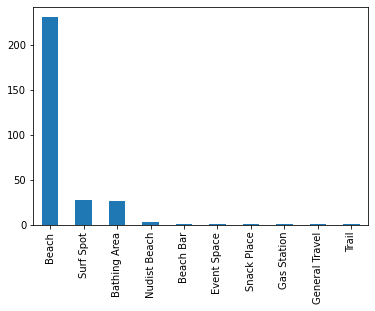

In [1170]:
fsqr_beach['category'].value_counts().sort_values(ascending=False).plot.bar()

In [ ]:
plot_map(fsqr_beach)

#### Well, this is not exactly the expected but is not bad. This approach has offered rich insight on possibilities of searches accros the litoral coast.

### Combining Beaches

In [355]:
len(wiki_beach['beach']), len(praias), sum([i.lower() not in [j.lower() for j in praias] for i in wiki_beach['beach']])

(98, 79, 45)

In [324]:
only_wiki = [i for i in wiki_beach[beach] if i not in praias]
praias = praias+only_wiki

In [325]:
len(only_wiki), len(praias)

(45, 124)

# Getting Coordinates: Neighborhoods

## Formatting Neighborhoods Names for Search

In [166]:
bairros_rj = [i+', Rio de Janeiro' for i in bairros]

In [214]:
to_fix = ['Freguesia (Ilha do Governador), Rio de Janeiro', 'Imperial de São Cristóvão, Rio de Janeiro', 'Vila Cosmos, Rio de Janeiro']

In [232]:
fixed = ['Freguesia, Ilha do Governador', 'Imperial de São Cristóvão, RJ', 'Vila Cosmos, RJ']

In [183]:
index = [bairros_rj.index(i) for i in to_fix]

In [184]:
for i in range(3):
    bairros_rj[index[i]] = fixed[i]

## Searching for Coordinates

In [186]:
hoods = [praias_rj, bairros_rj]
hoods_names = ['praias', 'bairros']

In [193]:
half = frame_coords(bairros_rj[:76], 'bairros')
other_half = frame_coords(bairros_rj[76:], 'bairros')

Appended: 1 Attempts: 1
Appended: 9 Attempts: 9
Appended: 17 Attempts: 17
Appended: 25 Attempts: 25
Appended: 33 Attempts: 33
Appended: 41 Attempts: 41
Appended: 49 Attempts: 49
Appended: 57 Attempts: 57
Appended: 65 Attempts: 65
Appended: 73 Attempts: 73
Fail List:  []
Completed
Appended: 1 Attempts: 1
Appended: 9 Attempts: 9
Appended: 17 Attempts: 17
Appended: 25 Attempts: 25
Appended: 33 Attempts: 33
Appended: 41 Attempts: 41
Appended: 49 Attempts: 49
Appended: 57 Attempts: 57
Appended: 65 Attempts: 65
Appended: 73 Attempts: 73
Appended: 81 Attempts: 81
Fail List:  []
Completed


In [563]:
bairros_df = pd.concat([half, other_half], axis=0)

### All Neighborhoods Coordinates Successfully Aquired

#### Formatting search names back

In [564]:
bairros_df['bairros'] = [i[:-16] if i not in fixed else (to_fix[0][:-16] if i==fixed[0] else i[:-4]) for i in bairros_df['bairros']]

In [565]:
len(bairros_df)

163

## Evaluating Result

In [ ]:
plot_map(bairros_df, zoom=11)

## Spotting Bad Coordinates: Outliers

In [495]:
bairros_df.describe()

,lat,lng,area,radius
count,163.000000,163.000000,1.630000e+02,163.000000
mean,-22.034582,-44.794142,7.387408e+06,1171.376029
std,7.362797,7.638167,1.839828e+07,992.677595
min,-34.576697,-104.626243,1.611178e+05,226.462764
25%,-22.930916,-43.375841,1.343236e+06,653.839580
50%,-22.891522,-43.296776,2.534304e+06,898.161495
75%,-22.847531,-43.227707,4.744831e+06,1228.933493
max,40.755393,-43.109199,1.395012e+08,6663.678713


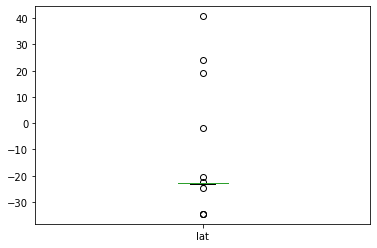

In [566]:
bairros_df.plot(kind='box', y='lat')

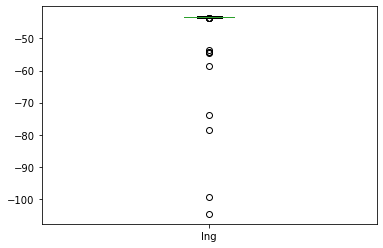

In [451]:
bairros_df.plot(kind='box', y='lng')

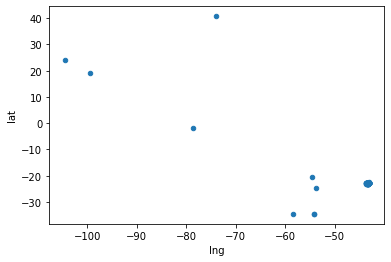

In [550]:
bairros_df.plot(kind='scatter', x='lng', y='lat')

#### Above we can see all outliers and our correct observations groupped in the extreme right.

<ipython-input-515-1c7777508d11>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bairros_df[bairros_df['lat']>-24][bairros_df['lat']<-22.7].plot(kind='scatter', x='lng', y='lat')


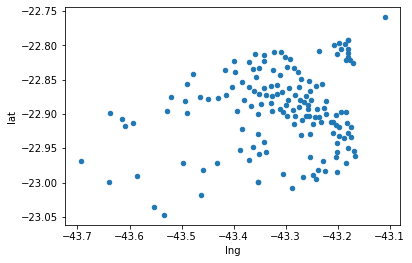

In [515]:
bairros_df[bairros_df['lat']>-24][bairros_df['lat']<-22.7].plot(kind='scatter', x='lng', y='lat')

#### Above we can see the correct observations isolated. Note how the scale is much smaller.

In [529]:
bad_lat = pd.concat([bairros_df[bairros_df['lat']>-22.7], bairros_df[bairros_df['lat']<-24]], axis=0)

In [530]:
bad_lat

,bairros,lat,lng,area,radius
2,água santa,-1.680751,-78.635140,2.426232e+06,878.802356
28,centro,-20.429425,-54.596237,5.424739e+06,1314.057881
30,cidade nova,40.755393,-73.989783,9.348529e+05,545.502443
34,colégio,-22.507101,-43.136713,2.261110e+06,848.371235
61,guadalupe,24.043406,-104.626243,3.820008e+06,1102.699509
130,santa cruz,19.300277,-99.506041,1.250443e+08,6308.948836
126,rocha,-34.576697,-54.126319,1.311626e+06,646.145027
127,rocha miranda,-34.576697,-54.126319,2.886706e+06,958.575457
140,tanque,-34.498114,-58.532314,5.567990e+06,1331.294969
161,vista alegre,-24.750625,-53.724992,5.152091e+05,404.964362


## Getting Bad Coordinates Right

In [532]:
fixed_coords = frame_coords(bad_lat['bairros']+', RJ')

Appended: 1 Attempts: 1
Appended: 9 Attempts: 9
Fail List:  []
Completed


In [533]:
fixed_coords['venue'] = [i[:-4] for i in fixed_coords['venue']]

In [569]:
fixed_coords

,venue,lat,lng
0,água santa,-22.911143,-43.312126
1,centro,-22.904393,-43.183065
2,cidade nova,-22.910051,-43.201756
3,colégio,-22.839790,-43.335762
4,guadalupe,-22.837621,-43.375161
5,santa cruz,-22.917625,-43.683491
6,rocha,-22.899562,-43.248807
7,rocha miranda,-22.850347,-43.346305
8,tanque,-22.915193,-43.355747
9,vista alegre,-22.829624,-43.315128


#### Yeah, we got every single coordinate correctly, that's cool right.

In [ ]:
plot_map(fixed_coords)

## Replacing Bad Coordinates

In [584]:
bairros_df.loc[bad_lat.index, 0:3] = fixed_coords.values

## Testing

In [585]:
bairros_df.loc[bad_lat.index]

,bairros,lat,lng
2,água santa,-22.911143,-43.312126
28,centro,-22.904393,-43.183065
30,cidade nova,-22.910051,-43.201756
34,colégio,-22.839790,-43.335762
61,guadalupe,-22.837621,-43.375161
130,santa cruz,-22.917625,-43.683491
126,rocha,-22.899562,-43.248807
127,rocha miranda,-22.850347,-43.346305
140,tanque,-22.915193,-43.355747
161,vista alegre,-22.829624,-43.315128


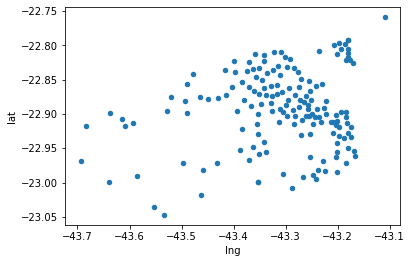

In [581]:
bairros_df.plot(kind='scatter', y='lat', x='lng')

## Saving

In [586]:
#bairros_df.to_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/rio dataframes/Search Data/coords_bairros.csv')

for table, name in zip(spots_coords, spots_names):
    table.to_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/rio dataframes/spots coords/coords_'+name+'.csv')

## Loading

In [372]:
praias_df = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/rio dataframes/Search Data/coords_praias.csv').drop('Unnamed: 0', axis=1)

In [583]:
bairros_df = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/rio dataframes/Search Data/coords_bairros.csv').drop('Unnamed: 0', axis=1)

In [31]:
coords = [pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/rio dataframes/spots coords/coords_'+i+'.csv').drop('Unnamed: 0', axis=1) for i in spots_names]

turis, cult, sport, eco = (i for i in coords)

### Extra: Finding Spots Coordinates

In [ ]:
spots = [tur, cult, sport, eco]
spots_names = ['turismo', 'cultura', 'esporte', 'ecologia']

In [ ]:
spots_coords = [frame_coords(i, j) for i, j in zip(spots, spots_names)]

# Getting Neighborhoods Areas from data.rio Data

### Loading

In [293]:
data_rio = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\\Limite_de_Bairros.csv')

## Crossing New Neighborhoods with Available Ones

In [294]:
only_datario = [i for i in data_rio['NOME'] if i.strip().lower() not in [j.strip().lower() for j in bairros]]

In [295]:
only_bairros = [i for i in bairros if i.strip().lower() not in [j.strip().lower() for j in data_rio['NOME']]]

In [296]:
only_datario, only_bairros          

(['Freguesia (Ilha)          ',
  'Parque Colúmbia           ',
  'Vila Kosmos               ',
  'Turiaçú                   ',
  'Osvaldo Cruz              ',
  'São Cristóvão             '],
 ['Freguesia (Ilha do Governador)',
  'Imperial de São Cristóvão',
  'Oswaldo Cruz',
  'Parque Columbia',
  'Turiaçu',
  'Vila Cosmos'])

## Processing data.rio Data

In [297]:
datario_area = data_rio[['NOME', 'Área']].rename(columns={'NOME':'bairros'})
datario_area['bairros'] = [i.strip().lower() for i in datario_area['bairros']]

In [298]:
bairros_copy = bairros_df.copy()
bairros_copy['bairros'] = [i.strip().lower() for i in bairros_copy['bairros']]

In [299]:
b1 = bairros_copy['bairros'].values

In [300]:
b2 = datario_area['bairros'].values

In [301]:
out1 = [i for i in b1 if i not in b2]

In [302]:
out2 = [i for i in b2 if i not in b1]

In [303]:
out1

['freguesia (ilha do governador)',
 'imperial de são cristóvão',
 'oswaldo cruz',
 'parque columbia',
 'turiaçu',
 'vila cosmos']

In [304]:
out2

['freguesia (ilha)',
 'parque colúmbia',
 'vila kosmos',
 'turiaçú',
 'osvaldo cruz',
 'são cristóvão']

In [305]:
out_index = datario_area[datario_area['bairros'].isin(out2)].index
datario_area['bairros'][out_index] = ['freguesia (ilha do governador)',    
                                                 'parque columbia',
                                                 'vila cosmos',
                                                 'turiaçu',
                                                 'oswaldo cruz',                                            
                                                 'imperial de são cristóvão']

<ipython-input-305-a358c46e88c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datario_area['bairros'][out_index] = ['freguesia (ilha do governador)',


## Merging data.rio area data with neighborhoods dataframe

In [306]:
datario_area

,bairros,Área
0,paquetá,1.705685e+06
1,freguesia (ilha do governador),4.056403e+06
2,bancários,9.780465e+05
3,galeão,1.895742e+07
4,tauá,1.672546e+06
...,...,...
158,campo grande,1.044451e+08
159,bangu,3.596620e+07
160,gericinó,2.534304e+06
161,jabour,3.273271e+05


In [307]:
bairros_copy

,bairros,lat,lng
0,abolição,-22.886161,-43.299846
1,acari,-22.822153,-43.340674
2,água santa,-1.680751,-78.635140
3,alto da boa vista,-22.962113,-43.253582
4,anchieta,-22.823190,-43.399107
...,...,...,...
158,vila kennedy,-22.855678,-43.490030
159,vila militar,-22.860348,-43.402893
160,vila valqueire,-22.888609,-43.365776
161,vista alegre,-24.750625,-53.724992


In [308]:
bairros_df = pd.merge(bairros_copy, datario_area, on='bairros').rename(columns={'Área':'area'})

In [309]:
bairros_df

,bairros,lat,lng,area
0,abolição,-22.886161,-43.299846,6.163327e+05
1,acari,-22.822153,-43.340674,1.605524e+06
2,água santa,-1.680751,-78.635140,2.426232e+06
3,alto da boa vista,-22.962113,-43.253582,3.149568e+07
4,anchieta,-22.823190,-43.399107,4.345727e+06
...,...,...,...,...
158,vila kennedy,-22.855678,-43.490030,1.473737e+06
159,vila militar,-22.860348,-43.402893,1.075671e+07
160,vila valqueire,-22.888609,-43.365776,4.232215e+06
161,vista alegre,-24.750625,-53.724992,5.152091e+05


### All Areas Successfuly Aquired !

## Radius Estimation

In [311]:
bairros_df['radius'] = bairros_df['area'].map(lambda a: np.sqrt(a/np.pi) )

## Saving Neighborhoods Complete Result to csv:

In [582]:
#bairros_df.to_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/rio dataframes/Search Data/complete_bairros.csv')

## Loading Neighborhoods Complete Result

In [587]:
bairros_df = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/rio dataframes/Search Data/complete_bairros.csv').drop('Unnamed: 0', axis=1)

## Evaluating Areas and Radiuses

In [1202]:
plot_search_map(bairros_df)

### Exploratory Analysis

In [315]:
bairros_df[['area', 'radius']].describe()

,area,radius
count,1.630000e+02,163.000000
mean,7.387408e+06,1171.376029
std,1.839828e+07,992.677595
min,1.611178e+05,226.462764
25%,1.343236e+06,653.839580
50%,2.534304e+06,898.161495
75%,4.744831e+06,1228.933493
max,1.395012e+08,6663.678713


# Foursquare Setting

In [1106]:
import urllib.request
import json

In [1107]:
def foursquare_url(query=False,
                   explore=False,
                   venue=False,
                   ctgr_search=False,
                   ctgr_explore=False,
                   search_query=None,
                   ctgr_id=None,
                   venue_id=None,
                   radius=1500,
                   LIMIT=800,
                   lat=-22.9719642,       # Rio de Janeiro Center Coords
                   lng=-43.1843432):

    CLIENT_ID = 'YBZLHWZRC4DJGEF2GVTRMDCQZBCZXDBC0ZXPAMHZFR0RF3BC' # your Foursquare ID
    CLIENT_SECRET = 'NXISZGNL4VVTR24LS2GE3ZVQ14URDHPP0S0UNJTC41CKFW4I' # your Foursquare Secret
    VERSION = '20200604'
    latitude=lat
    longitude=lng
    
    expl_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
    query_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    venue_url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    ctgr_expl_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&category_Id={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT, ctgr_id)
    ctgr_srch_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT, ctgr_id)
    
    if ctgr_explore: return ctgr_expl_url
    if ctgr_search: return ctgr_srch_url
    if query: return query_url
    if explore: return expl_url
    if venue: return venue_url

In [173]:
expl_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
query_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
venue_url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

### Single API Call

In [505]:

rqst_obj = urllib.request.urlopen(foursquare_url(ctgr_search=True,
                                                 ctgr_id='4bf58dd8d48988d1fa931735', 
                                                 lat=bairros.lat[45], 
                                                 lng=bairros.lng[45],
                                                 radius=2000))

rqst_txt = rqst_obj.read().decode()[:]

In [156]:
json_normalize(json.loads(rqst_txt)['response']['venues']).head()#['groups'][0]['items'])['venue.categories']]

NameError: name 'rqst_txt' is not defined

# Planning

## Further data collection steps:


### Gather Beaches Coords

1. Fix hoods and beaches names to search for coords.
    1. Result: Two lists: Hoods and beaches names fixed.
2. Find coords of fixed lists of oficial hoods and beaches, using geocoder.
    1. Certify if coords are all from RJ.
    2. Result: Oficial beaches and hoods lats and lngs values concatenated with the non-fixed lists as dataframes.
3. Get more beaches with foursquare
    1. Search per category around one big radius or multiple small radius (maybe no radius).
4. Compare foursquare result with oficial list.   
    1. Result: Dataframe of unseen beaches with coords. 
5. Append foursquare unseen results
6. Fix hoods radius if necessary, concat to new frames.  DONE
7. Get beaches lenghts, convert to radius. 

---
#### Gather Data (Organized)

1. General search over: beaches, neighborhoods
    1. Result: two dataframes of venues.
2. General explore over: beaches, neighborhoods
    1. Result: two dataframes of venues.
3. Construct a loop to use get_venues function to do the following:
4. Search per category beaches and neighborhoods: you can append results per category together if you add a new column 'parent.category'
    1. Result: two dataframes of venues.
5. Get Hotels Separately

    
---
1.  Add new features: Try this, for each "region" you have, that would be around neighborhoods, beaches or hotels, make the same transformations and models for each. Try to let all tables in the same standard.

    1. radial distance variation per neighborhood
    2. radial distance variation per parent category
    3. Hoh many beaches around, per square foot, and radial distance deviation
    4. variancia latitude e longitude dos estabelecimentos (uma variavel) ou dos estabelecimentos por categoria (varias variaveis), de cada bairro e hotel.

Ideas: Search around each hotel. you can get the same as you are getting for hoods basically, including hotel frequency,w hotel radial distance and hotel category frequency (and other categories as well).

### Done:
2. Get neighborhood search personalized with radius info. Done

#### Categories for search:
0. Food: 4d4b7105d754a06374d81259
1. Nightlife spots: 4d4b7105d754a06376d81259
2. Outdoors & Recreation: 4d4b7105d754a06377d81259
3. Beach: 4bf58dd8d48988d1e2941735
4. Shop e Services: 4d4b7105d754a06378d81259
5. Hotel: 4bf58dd8d48988d1fa931735
6. Travel and transport: 4d4b7105d754a06379d81259
7. Event: 4d4b7105d754a06373d81259
8. Arts & Entertainment: 4d4b7104d754a06370d81259

## Columns Results

#### General Explore, Search: One dataframe for neighborhoods, one for beaches.

0. neighborhood or beach
1. venue.id
2. venue.name
3. venue.location.lat
4. venue.location.lng
5. venue.location.distance
6. venue.categories
7. CEP

#### Category Search:

1. parent.category
1. neighborhood or beach
1. id
1. name
1. category_id
1. category
1. location.lat
1. location.lng
1. location.distance

#### Specific venue: Complement the original 4 dataframes with the additional information

1. rating
1. description
1. likes.count
1. attributes.groups

# Venues Around Neighborhoods

#### Takes a dataframe of venues and coords, and a list of columns names. Returns the dataframe added with the columns specified in the list.

In [1108]:
def get_venues(df,
               radius = 1000,
               explore=False,
               query=False,
               ctgr_search=False,
               ctgr_explore=False, 
               ctgr_id=None,
               search_query=None
              ):
    
    if type(radius)==int: radius = [radius for i in range(len(df))]

    keeper_cols = [df.columns[0], 'venue.id', 'venue.name', 'venue.category_id', 'venue.category', 'venue.location.lat', 'venue.location.lng', 'venue.location.distance']
    keeper_cols_ctgr = [df.columns[0], 'id', 'name', 'category_id', 'category', 'location.lat', 'location.lng', 'location.distance']
    rqst_fail = []
    append_fail = []
    cnt = 0
    
    if ctgr_search: hoods_expl = pd.DataFrame(columns=keeper_cols_ctgr)
    else: hoods_expl = pd.DataFrame(columns=keeper_cols)
    
    
    
    for name, lat, lng, radius in zip(df.iloc[:, 0], df['lat'], df['lng'], radius):
     
        try: rqst_txt = urllib.request.urlopen(foursquare_url(explore=explore,
                                                              query=query,
                                                              ctgr_search=ctgr_search,
                                                              ctgr_explore=ctgr_explore,
                                                              ctgr_id=ctgr_id,
                                                              search_query=search_query,
                                                              lat=lat, 
                                                              lng=lng,
                                                              radius=radius)).read().decode()[:]
        except: 
            try: rqst_txt = urllib.request.urlopen(foursquare_url(explore=True,
                                                                  lat=lat, 
                                                                  lng=lng,
                                                                  radius=radius)).read().decode()[:]
            except:
                print(name)
                rqst_fail.append(name)
                continue

        if not ctgr_search: rqst_df = json_normalize(json.loads(rqst_txt)['response']['groups'][0]['items'])  
        else: rqst_df = json_normalize(json.loads(rqst_txt)['response']['venues'])
        
        if len(rqst_df)==0: 
            append_fail.append(name)
            continue
        
        rqst_df[keeper_cols[0]] = [name for i in range(len(rqst_df))]
    
        if not ctgr_search:            
            if 'venue.categories' in rqst_df.columns:
                rqst_df['venue.category_id'] = [i[0]['id'] if i!=[] else np.nan for i in rqst_df['venue.categories']] 
                rqst_df['venue.category'] = [i[0]['name'] if i!=[] else np.nan for i in rqst_df['venue.categories']]   
            else: 
                rqst_df['venue.category_id'] = [np.nan for i in range(len(rqst_df))]
                rqst_df['venue.category'] = [np.nan for i in range(len(rqst_df))]
                
            hoods_expl = pd.concat([hoods_expl, rqst_df[keeper_cols]], axis=0)
            
        else:
            if 'categories' in rqst_df.columns:
                rqst_df['category_id'] = [i[0]['id'] if i!=[] else np.nan for i in rqst_df['categories']] 
                rqst_df['category'] = [i[0]['name'] if i!=[] else np.nan for i in rqst_df['categories']]   
            else: 
                rqst_df['category_id'] = [np.nan for i in range(len(rqst_df))]
                rqst_df['category'] = [np.nan for i in range(len(rqst_df))]
                
            hoods_expl = pd.concat([hoods_expl, rqst_df[keeper_cols_ctgr]], axis=0)
        
        
        cnt+=1
        if cnt in range(0, len(df), 10): print('appended:', cnt, 'rqst_fail:', len(rqst_fail), 'append_fail:', len(append_fail))
    
    print('Searched:', len(df), 'Failed:', len(append_fail)+len(rqst_fail))
    print('Fail list: ', append_fail)
    print('Completed')
    return hoods_expl.reset_index(drop=True)


### Save neighborhoods exploration Result:

##### 3000 m radius

In [58]:
#hoods_expl.to_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/rio dataframes/venues/exploration_of_neighborhoods.csv')

#### Estimated radius

In [218]:
#hoods_expl.to_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/rio dataframes/venues/exploration_of_neighborhoods_radius.csv')

### Load neighborhoods exploration Result:

##### 3000 m radius

In [13]:
hoods_expl = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/rio dataframes/venues/exploration_of_neighborhoods.csv').drop('Unnamed: 0', axis=1)

#### Estimated radius

In [5]:
hoods_expl = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/rio dataframes/venues/exploration_of_neighborhoods_radius.csv').drop('Unnamed: 0', axis=1)

In [220]:
hoods_expl.head(3)

,neighborhood,venue.id,venue.name,venue.category.id,venue.category,venue.location.lat,venue.location.lng,venue.location.distance
0,abolição,4d5dad65f7d7224b54652081,Crepe Lieto,4bf58dd8d48988d146941735,Deli / Bodega,-22.885457,-43.299354,93
1,abolição,523e424f11d2b11ae99aa553,Esquina do Espeto,4bf58dd8d48988d1c4941735,Restaurant,-22.887830,-43.302740,350
2,abolição,4ba55e8df964a5200a0039e3,Rei do Bacalhau,4def73e84765ae376e57713a,Portuguese Restaurant,-22.889826,-43.300841,420


## Neighborhoods Venues data Exploratory Analysis

In [221]:
hoods_expl[['venue.location.distance']].describe()

,venue.location.distance
count,7471.000000
mean,1090.087672
std,806.212620
min,8.000000
25%,620.000000
50%,965.000000
75%,1336.500000
max,7172.000000


In [222]:
hoods_expl['venue.category'].value_counts().head(20)

Bar                     365
Brazilian Restaurant    355
Gym / Fitness Center    293
Pizza Place             280
Bakery                  279
Restaurant              209
Gym                     204
Burger Joint            197
Plaza                   191
Fast Food Restaurant    149
Snack Place             138
Japanese Restaurant     121
Hotel                   116
Food Truck              115
Sandwich Place          109
Seafood Restaurant       99
Supermarket              96
Ice Cream Shop           95
Chocolate Shop           90
BBQ Joint                86
Name: venue.category, dtype: int64

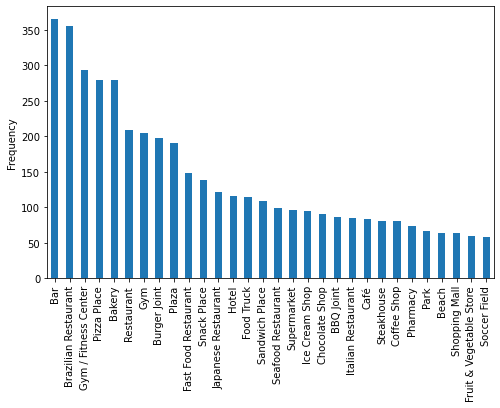

In [9]:
hoods_expl['venue.category'].value_counts().head(30).plot(kind='bar', figsize=(8, 5))        # What a cute barplot of our city

#plt.title('Rio de Janeiro Venue Category Frequency')
plt.ylabel('Frequency')

plt.savefig('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/Final Capstone Project/Commom places.png')

In [12]:
import seaborn as sns

Text(0, 0.5, 'density')

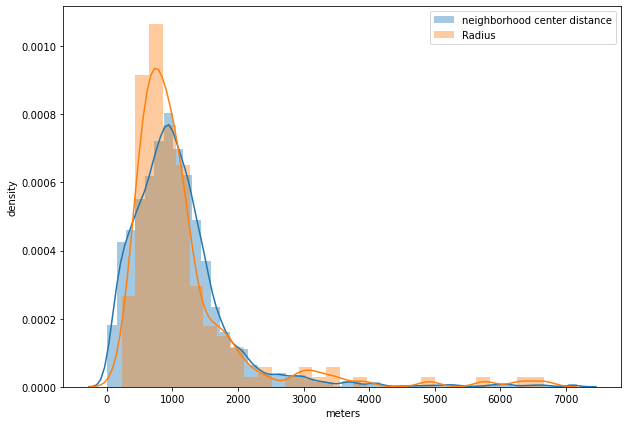

In [15]:
fig = plt.figure(figsize=(10,7))

sns.distplot(hoods_expl['venue.location.distance'])#, ax=ax1)
sns.distplot(bairros['radius'])#, ax=ax1)

plt.legend(['neighborhood center distance', 'Radius'])
plt.xlabel('meters')
plt.ylabel('density')

## Radial Distance Analysis

### Average Radial Distance per Neighborhood

In [21]:
hoods_expl.groupby('neighborhood', sort=False).mean()['venue.location.distance'].shape, bairros['radius'].shape


((158,), (163,))

In [46]:
avg_rad_dist = pd.merge(bairros.rename(columns={'bairros': 'neighborhood'}), hoods_expl.groupby('neighborhood', sort=False).agg([np.mean, np.std]).iloc[:, -2:], on='neighborhood').rename(columns={('venue.location.distance', 'mean'):'rad.dist.avg', ('venue.location.distance', 'std'):'rad.dist.sd'})

C:\Users\luisr\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [48]:
avg_rad_dist.shape

(158, 7)

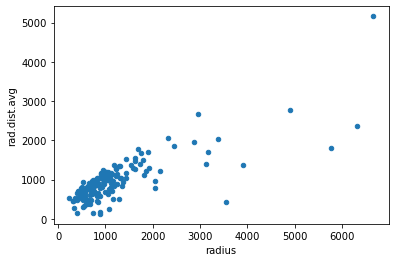

In [54]:
avg_rad_dist.plot(x='radius', y='rad.dist.avg', kind='scatter')

### All Radial Distances per radius

In [ ]:
avg_rad_dist = pd.merge(bairros.rename(columns={'bairros': 'neighborhood'}), hoods_expl.groupby('neighborhood', sort=False).agg([np.mean, np.std]).iloc[:, -2:], on='neighborhood').rename(columns={('venue.location.distance', 'mean'):'rad.dist.avg', ('venue.location.distance', 'std'):'rad.dist.sd'})

In [63]:
rad_dist = pd.merge(bairros[['bairros', 'radius']].rename(columns={'bairros': 'neighborhood'}), hoods_expl[['neighborhood','venue.category', 'venue.location.distance']], on='neighborhood')

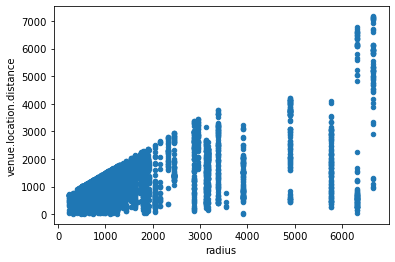

In [64]:
rad_dist.plot(x='radius', y='venue.location.distance', kind='scatter')

#### Apperently selection of venues inside estimated radius for each neighborhood area worked pretty well.

### Analysing radial distance variance of Hotels per neighborhood

In [137]:
hotel_dist = rad_dist[rad_dist['venue.category']=='Hotel'].groupby('neighborhood', sort=False, as_index=False).agg([np.mean, np.std]).reset_index().rename(columns={0:'neighborhood'}).sort_values(by=('venue.location.distance', 'std'))

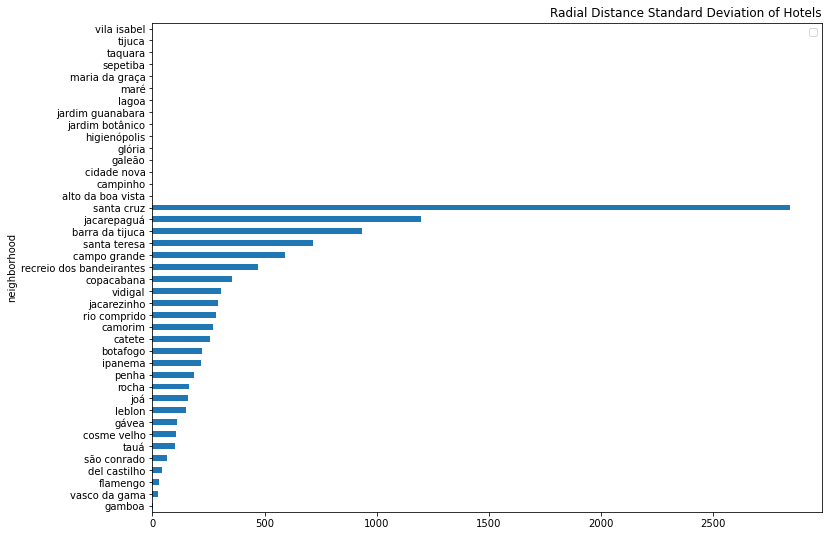

In [146]:
hotel_dist.plot( 'neighborhood', ('venue.location.distance','std'), kind='barh', figsize=(12, 9))
plt.title('Radial Distance Standard Deviation of Hotels', loc='right')
plt.legend('')

#### Using this horizontal bar chart is possible to compare how spread out hotels are in each neighborhood .We can see that hotels are more spread out in Barra da Tijuca than in Copacabana

In [266]:
lat_nam = 'venue.location.lat'
lng_nam = 'venue.location.lng'

df = hoods_expl[['venue.name', lat_nam, lng_nam]].rename(columns={lat_nam:'lat', lng_nam:'lng'})

In [10]:
plot_map_lite(df)

NameError: name 'plot_map_lite' is not defined

### Exploration Summary:
1. We have 11302 venues for 163 neighborhood searched in 3000 meters radius.
2. That means approximately 70 venues per neighborhood. Kind of a small sample.
3. Unfortunally we have a limit of 100 results per search here unless we subscribe to an enterprise level account, which is not our case.

# Beaches venues search

In [361]:
beach_venues = get_venues(praias, radius=1400)

<ipython-input-360-d3f0be9ca2d3>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  rqst_df = json_normalize(json.loads(rqst_txt)['response']['groups'][0]['items'])


appended: 10 rqst_fail: 0 append_fail: 2
appended: 20 rqst_fail: 0 append_fail: 5
appended: 30 rqst_fail: 0 append_fail: 8
appended: 40 rqst_fail: 0 append_fail: 10
appended: 50 rqst_fail: 0 append_fail: 13
appended: 60 rqst_fail: 0 append_fail: 15
appended: 70 rqst_fail: 0 append_fail: 19
appended: 80 rqst_fail: 0 append_fail: 24
Searched: 106 Failed: 26


In [356]:
len(praias)

106

In [359]:
beach_venues.head()

,neighborhood,venue.id,venue.name,venue.category.id,venue.category,venue.location.lat,venue.location.lng,venue.location.distance
0,Guanabara,4b4b349ff964a520739426e3,Rã-Chu,4bf58dd8d48988d1cc941735,Steakhouse,-22.889733,-47.067450,215
1,Guanabara,5b785c24ca18ea002c5c03ed,Los Vaqueros - Espeto Bar Restaurante,4bf58dd8d48988d116941735,Bar,-22.889640,-47.066956,166
2,Guanabara,4d81f90b2ad9a143311d7d28,Centro Médico Veterinário,4bf58dd8d48988d100951735,Pet Store,-22.890842,-47.066760,250
3,Guanabara,5c093598e55d8b002c275817,Bar da Roça,52e81612bcbc57f1066b79f4,Buffet,-22.889185,-47.066890,140
4,Guanabara,58a5c86f30ecc618cd51b78d,Empório Fazenda,4bf58dd8d48988d1e0931735,Coffee Shop,-22.889450,-47.065586,62


In [358]:
praias.head()

,praias,lat,lng
0,Guanabara,-22.888889,-47.065556
1,Dendê,-4.789174,13.817731
2,Engenho Velho,-27.711450,-52.912569
3,Itacolomi,-29.870192,-50.979431
4,Jequiá,-22.820548,-43.181246


### Beaches Exploratory Analysis

In [341]:
beach_venues['venue.category'].value_counts().head(20)

Brazilian Restaurant    135
Bar                     124
Pizza Place             118
Bakery                  115
Gym / Fitness Center    110
Beach                   107
Hotel                   103
Restaurant               91
Burger Joint             62
Plaza                    58
Seafood Restaurant       53
Snack Place              52
Gym                      52
Ice Cream Shop           48
Italian Restaurant       48
Coffee Shop              48
Steakhouse               46
Japanese Restaurant      45
Café                     45
Park                     43
Name: venue.category, dtype: int64

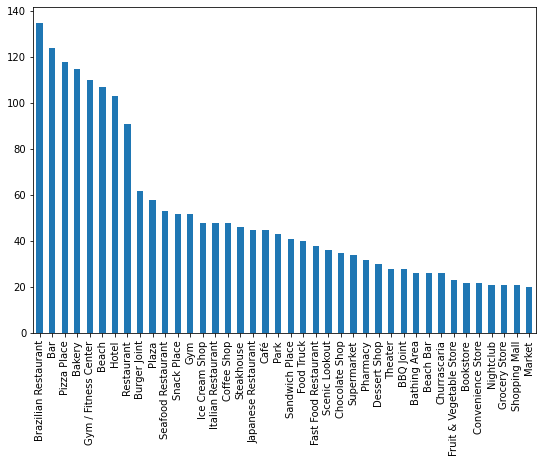

In [347]:
beach_venues['venue.category'].value_counts().head(40).plot(kind='bar', figsize=(9,6))
plt.title('Most commom venues categories around beaches')

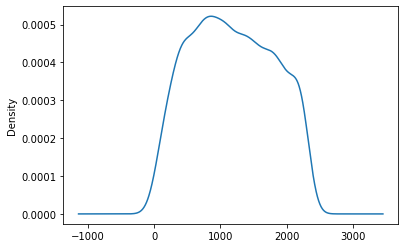

In [349]:
beach_venues['venue.location.distance'].plot(kind='kde')

In [350]:
b_cols = beach_venues.columns

In [352]:
beach_map = beach_venues.rename(columns={i:j.split('.')[-1] for i,j in zip(b_cols[4:], b_cols[4:])}).rename(columns={ b_cols[3] : '.'.join(b_cols[3].split('.')[1:]) })

In [ ]:
plot_map_lite(beach_map)

## Search Neighborhoods venues per Category:

In [518]:
bairros_hoteis = get_venues(bairros.loc[10:20], radius=bairros.radius[10:20], ctgr_search=True, ctgr_id='4bf58dd8d48988d1fa931735')#4bf58dd8d48988d1fa931735

<ipython-input-517-3a409116f05c>:38: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  else: rqst_df = json_normalize(json.loads(rqst_txt)['response']['venues'])


Searched: 11 Failed: 4
Fail list:  ['barra de guaratiba', 'barros filho', 'benfica', 'brás de pina']
Completed


In [519]:
bairros_hoteis

,bairros,id,name,category_id,category,location.lat,location.lng,location.distance
0,bento ribeiro,4f4baedbe4b0eddb54773c8b,stallion motel,4bf58dd8d48988d1fb931735,Motel,-22.870199,-43.357498,521
1,bonsucesso,4f497d21e4b0922ac64b7e23,Motel Free,4bf58dd8d48988d1fb931735,Motel,-22.867386,-43.256129,330
2,bonsucesso,4f8b3e6ce4b0af04c2346cda,Hotel Show,4bf58dd8d48988d1fa931735,Hotel,-22.858158,-43.252597,868
3,bonsucesso,5088149ce4b0b6701e3d174c,Hotel Itaoka,4bf58dd8d48988d1fb931735,Motel,-22.868276,-43.260096,742
4,bonsucesso,51e77536498e001aa4681abd,motel pinto loko,4bf58dd8d48988d1fb931735,Motel,-22.866844,-43.246143,742
...,...,...,...,...,...,...,...,...
58,cachambi,53754b01498eb9542d0d2f2a,Château da Isis,4bf58dd8d48988d12f951735,Resort,-22.892514,-43.274840,308
59,cachambi,506e0023e4b0723f1bc56a50,Trek and Fly Hostel,4bf58dd8d48988d1ee931735,Hostel,-22.898062,-43.275850,934
60,cacuia,4c98d4d16ffe8cfaf8730030,Ilha Palace Hotel,4bf58dd8d48988d1fa931735,Hotel,-22.820304,-43.190819,737
61,caju,4f3a3485e4b024185ba90c3d,Golden Tulip São Conrado,4bf58dd8d48988d1fa931735,Hotel,-22.884163,-43.228511,838


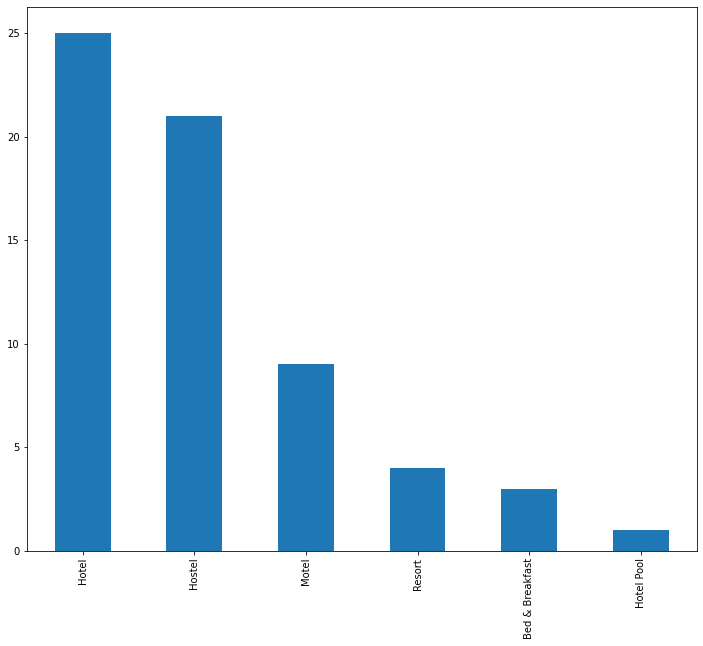

In [521]:
bairros_hoteis['category'].value_counts().head(40).plot(kind='bar', figsize=(12,10))

# Search Each Venue: Limit 500 per day

#### Takes a dataframe with venues ids and names, returns a dataframe with the additional information of the venues in new columns (columns must be defined)

In [11]:
def get_details(df):

    extra = ['hereNow.count', 'hereNow.summary']
    keeper_cols = ['venue_name',
                   'id',
                   'name',
                   'rating',
                   'likes.count',
                   'attributes.groups']+extra

    expl_ids = pd.DataFrame(columns=keeper_cols)
    fail_list = []
    cnt=0

    for venue, venue_id in zip(df.iloc[:, 1], df.iloc[:, 0]):
    
        if cnt in range(1, len(df), 240): time.sleep(4)
    
        try: rqst_txt = urllib.request.urlopen(foursquare_url(venue=True, venue_id=venue_id)).read().decode()[:]                
        
        except:
            try: rqst_txt = urllib.request.urlopen(foursquare_url(venue=True, venue_id=venue_id)).read().decode()[:]   
         
            except:
                try: rqst_txt = urllib.request.urlopen(foursquare_url(venue=True, venue_id=venue_id)).read().decode()[:]   
                
                except: 
                    row = pd.DataFrame([venue, venue_id]+[np.nan for i in range(len(keeper_cols)-2)]).T
                    expl_ids = pd.concat([expl_ids, row], axis=0)
                    fail_list.append([venue, venue_id])
                    print('fail:', venue, venue_id)
                    continue
                    
        rqst_json = json.loads(rqst_txt)['response']['venue']
                   
        rqst_row = json_normalize(json.loads(rqst_txt)['response']['venue'])       
        rqst_row['venue_name'] = venue
        rqst_row['attributes.groups'][0] = ([i['name'] for i in rqst_row['attributes.groups'][0]])
        
        if 'rating' not in rqst_row.columns: rqst_row['rating']=[np.nan]
        if 'likes.count' not in rqst_row.columns: rqst_row['likes.count']=[np.nan]
                    
        row = rqst_row[keeper_cols]        
        expl_ids = pd.concat([expl_ids, row], axis=0)       
        
        cnt+=1
        if cnt in range(0,len(df), 30): print('Appended:', len(expl_ids), 'Searched:', cnt )
                
    return expl_ids

In [ ]:
get_details

## Query

In [ ]:
[i[0] if i!= [] else np.nan for i in json_normalize(json.loads(rqst_txt)['response']['venues'])['categories']]

In [ ]:
[print(j, [i[0]['id'] for i in restau['categories'][:j]] if i!= []) for j in range(37)]

In [ ]:
restau.head()

## Explore

In [ ]:
json_normalize(json.loads(rqst_txt)['response']['groups'][0]['items'])         # for explore          ( get:  venue.id, venue.name, venue.location.lat, venue.location.lng, venue.location.distance, venue.categories)

## Specific Venue

In [ ]:
json_normalize(json.loads(rqst_txt)['response']['venue'])           # for specific venue: retrieves a row.         (get: id, name, categories, rating, description, lat, lng, likes.count, attributes.groups )